# EDA

In [1]:
%reload_ext autoreload
%autoreload 2

# check if working in colab
try:
    # In colab
    from google.colab import drive
    drive.mount('/content/drive')

    %cd /content/drive/MyDrive/projects/paris-traffic-forecast
    %pip install -q darts

except:
    # In local
    # replace with your path
    %cd ..

/mnt/d/Google Drive/projects/paris-traffic-forecast


In [2]:
# Import libraries
import matplotlib.pyplot as plt

## load data

In [40]:
# read txt files from folder
from tqdm import tqdm
import glob
import pandas as pd
# Get folder path containing text files
file_list = glob.glob("data/opendata_txt_*/*.txt")

useful_columns = ["libelle", "libelle_nd_amont", "libelle_nd_aval", "t_1h", "q", "k"] # drop rows with these missing values
keep_columns = useful_columns + ["etat_barre"]

all_df = pd.DataFrame()
for file_path in tqdm(file_list):
    df =  pd.read_csv(file_path, delimiter=";")
    # drop rows where q or k is null
    df.dropna(subset=useful_columns, inplace=True)
    all_df = all_df.append(df[keep_columns])
    
all_df.rename(columns={"libelle": "arc", "libelle_nd_amont": "noeud_amont", "libelle_nd_aval": "noeud_aval", "q":"debit", "k":"occupation", "t_1h":"time"}, inplace=True)
all_df

100%|██████████| 60/60 [03:54<00:00,  3.91s/it]


In [56]:
all_df

,arc,noeud_amont,noeud_aval,time,debit,occupation,etat_barre
504,Pyrenees,Pyrenees-Ermitage,Menilmontant-Pyrenees,2020-01-01 01:00:00,655.0,3.37833,3
505,Pyrenees,Pyrenees-Ermitage,Menilmontant-Pyrenees,2020-01-01 02:00:00,836.0,4.08056,3
506,Pyrenees,Pyrenees-Ermitage,Menilmontant-Pyrenees,2020-01-01 03:00:00,885.0,4.76167,3
507,Pyrenees,Pyrenees-Ermitage,Menilmontant-Pyrenees,2020-01-01 04:00:00,920.0,5.31167,3
508,Pyrenees,Pyrenees-Ermitage,Menilmontant-Pyrenees,2020-01-01 05:00:00,856.0,4.26111,3
...,...,...,...,...,...,...,...
238027,Bd_Massena,Bd_Massena-Av_de_Choisy,Bd_Massena-Lachelier,2020-12-31 20:00:00,441.1,8.15723,3
238028,Bd_Massena,Bd_Massena-Av_de_Choisy,Bd_Massena-Lachelier,2020-12-31 21:00:00,154.0,2.83667,3
238029,Bd_Massena,Bd_Massena-Av_de_Choisy,Bd_Massena-Lachelier,2020-12-31 22:00:00,84.7,1.32111,3
238030,Bd_Massena,Bd_Massena-Av_de_Choisy,Bd_Massena-Lachelier,2020-12-31 23:00:00,41.8,0.79389,3


In [67]:
# select arcs to work with
amont = ["Av_Champs_Elysees-Washington"]
aval = ["Av_Champs_Elysees-Berri"]
libelle = ["Av_Champs_Elysees"]

df = all_df[all_df["noeud_amont"].isin(amont) & all_df["noeud_aval"].isin(aval)]
print(df['arc'].unique())
df

['Av_des_Champs_Elysees']


,arc,noeud_amont,noeud_aval,time,debit,occupation,etat_barre
420169,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,2020-01-01 02:00:00,445.0,35.74778,3
420170,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,2020-01-01 03:00:00,953.0,21.13111,3
420171,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,2020-01-01 04:00:00,672.0,16.79945,3
420172,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,2020-01-01 05:00:00,623.0,10.92778,3
420173,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,2020-01-01 06:00:00,701.0,10.47444,3
...,...,...,...,...,...,...,...
180139,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,2020-12-31 20:00:00,728.0,18.19389,3
180140,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,2020-12-31 21:00:00,297.0,4.60278,3
180141,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,2020-12-31 22:00:00,132.0,2.61889,3
180142,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,2020-12-31 23:00:00,106.0,1.60722,3


In [76]:
pd.to_datetime(df.loc[:,time_col]).loc[:]

420169   2020-01-01 02:00:00
420170   2020-01-01 03:00:00
420171   2020-01-01 04:00:00
420172   2020-01-01 05:00:00
420173   2020-01-01 06:00:00
                 ...        
180139   2020-12-31 20:00:00
180140   2020-12-31 21:00:00
180141   2020-12-31 22:00:00
180142   2020-12-31 23:00:00
180143   2021-01-01 00:00:00
Name: time, Length: 8719, dtype: datetime64[ns]

In [77]:
import pandas as pd
time_col = "time"
value_cols = ['debit', "occupation"]
# set datetime index
# df[time_col] = pd.to_datetime(df[time_col], utc=True).dt.tz_localize(None)
df[time_col] = pd.to_datetime(df[time_col])
df[time_col] = pd.DatetimeIndex(df[time_col])
df = df.set_index(time_col)
df

/tmp/ipykernel_31457/1475299255.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[time_col] = pd.to_datetime(df[time_col])
/tmp/ipykernel_31457/1475299255.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[time_col] = pd.DatetimeIndex(df[time_col])


,arc,noeud_amont,noeud_aval,debit,occupation,etat_barre
time,,,,,,
2020-01-01 02:00:00,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,445.0,35.74778,3
2020-01-01 03:00:00,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,953.0,21.13111,3
2020-01-01 04:00:00,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,672.0,16.79945,3
2020-01-01 05:00:00,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,623.0,10.92778,3
2020-01-01 06:00:00,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,701.0,10.47444,3
...,...,...,...,...,...,...
2020-12-31 20:00:00,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,728.0,18.19389,3
2020-12-31 21:00:00,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,297.0,4.60278,3
2020-12-31 22:00:00,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,132.0,2.61889,3


In [78]:
df.iloc[0]

arc                   Av_des_Champs_Elysees
noeud_amont    Av_Champs_Elysees-Washington
noeud_aval          Av_Champs_Elysees-Berri
debit                                 445.0
occupation                         35.74778
etat_barre                                3
Name: 2020-01-01 02:00:00, dtype: object

In [79]:
df.iloc[-1]

arc                   Av_des_Champs_Elysees
noeud_amont    Av_Champs_Elysees-Washington
noeud_aval          Av_Champs_Elysees-Berri
debit                                  91.0
occupation                             1.39
etat_barre                                3
Name: 2021-01-01 00:00:00, dtype: object

In [80]:
df.describe()

,debit,occupation,etat_barre
count,8719.000000,8719.000000,8719.000000
mean,686.401078,11.388914,2.989219
std,431.941574,9.592382,0.103277
min,0.000000,0.000000,2.000000
25%,252.000000,2.881390,3.000000
50%,728.000000,9.653890,3.000000
75%,1082.000000,17.521115,3.000000
max,1610.000000,80.697780,3.000000


In [117]:
len(ts)

8783

In [116]:
ts.univariate_component(0).describe()

component,debit
count,8719.000000
mean,686.401078
std,431.941574
min,0.000000
25%,252.000000
50%,728.000000
75%,1082.000000
max,1610.000000


In [118]:
df

,arc,noeud_amont,noeud_aval,debit,occupation,etat_barre
time,,,,,,
2020-01-01 02:00:00,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,445.0,35.74778,3
2020-01-01 03:00:00,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,953.0,21.13111,3
2020-01-01 04:00:00,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,672.0,16.79945,3
2020-01-01 05:00:00,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,623.0,10.92778,3
2020-01-01 06:00:00,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,701.0,10.47444,3
...,...,...,...,...,...,...
2020-12-31 20:00:00,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,728.0,18.19389,3
2020-12-31 21:00:00,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,297.0,4.60278,3
2020-12-31 22:00:00,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,132.0,2.61889,3


In [120]:
# find index of missing values
df

,arc,noeud_amont,noeud_aval,debit,occupation,etat_barre
time,,,,,,
2020-01-01 02:00:00,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,445.0,35.74778,3
2020-01-01 03:00:00,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,953.0,21.13111,3
2020-01-01 04:00:00,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,672.0,16.79945,3
2020-01-01 05:00:00,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,623.0,10.92778,3
2020-01-01 06:00:00,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,701.0,10.47444,3
...,...,...,...,...,...,...
2020-12-31 20:00:00,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,728.0,18.19389,3
2020-12-31 21:00:00,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,297.0,4.60278,3
2020-12-31 22:00:00,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,132.0,2.61889,3


In [150]:
from darts import TimeSeries

# transform data to TimeSeries
ts = TimeSeries.from_dataframe(df, 
                          value_cols=value_cols,
                          fill_missing_dates=True,
                          freq='H'
                          )
ts

<TimeSeries (DataArray) (time: 8783, component: 2, sample: 1)>
array([[[445.     ],
        [ 35.74778]],

       [[953.     ],
        [ 21.13111]],

       [[672.     ],
        [ 16.79945]],

       ...,

       [[132.     ],
        [  2.61889]],

       [[106.     ],
        [  1.60722]],

       [[ 91.     ],
        [  1.39   ]]])
Coordinates:
  * time       (time) datetime64[ns] 2020-01-01T02:00:00 ... 2021-01-01
  * component  (component) object 'debit' 'occupation'
Dimensions without coordinates: sample

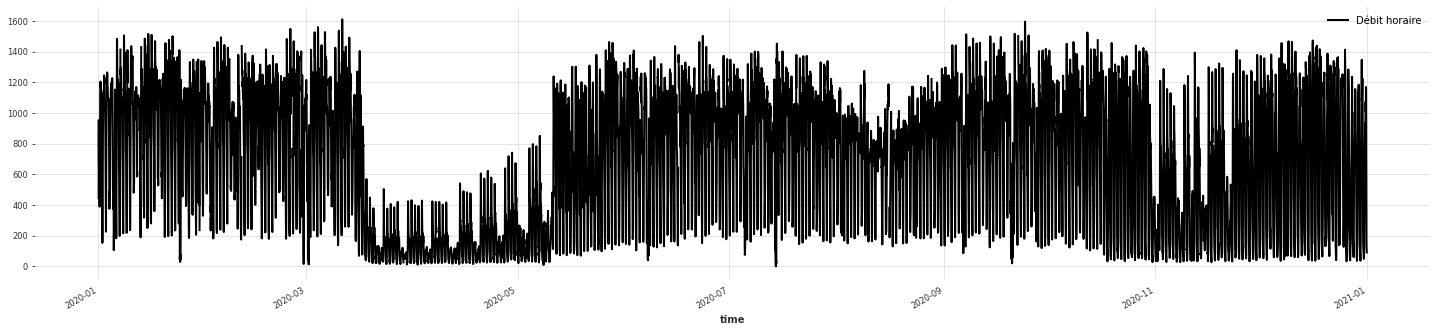

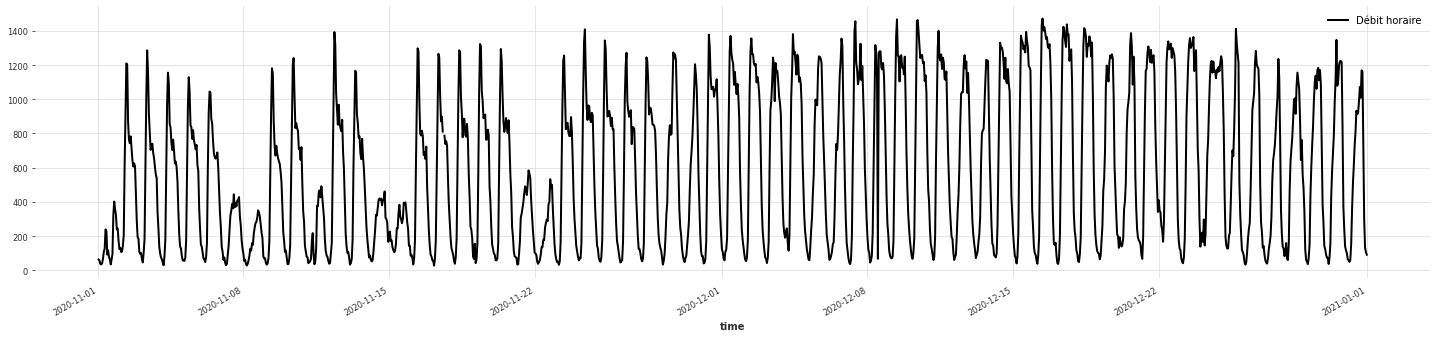

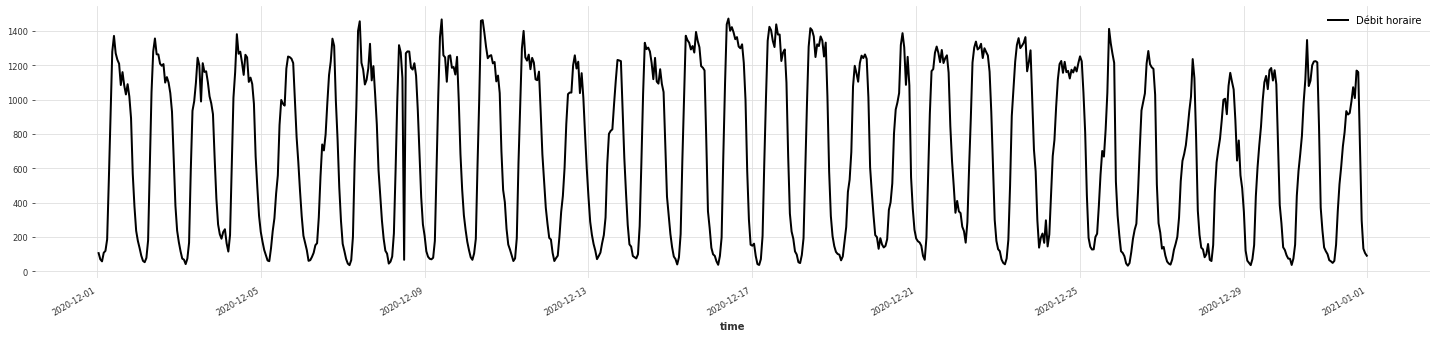

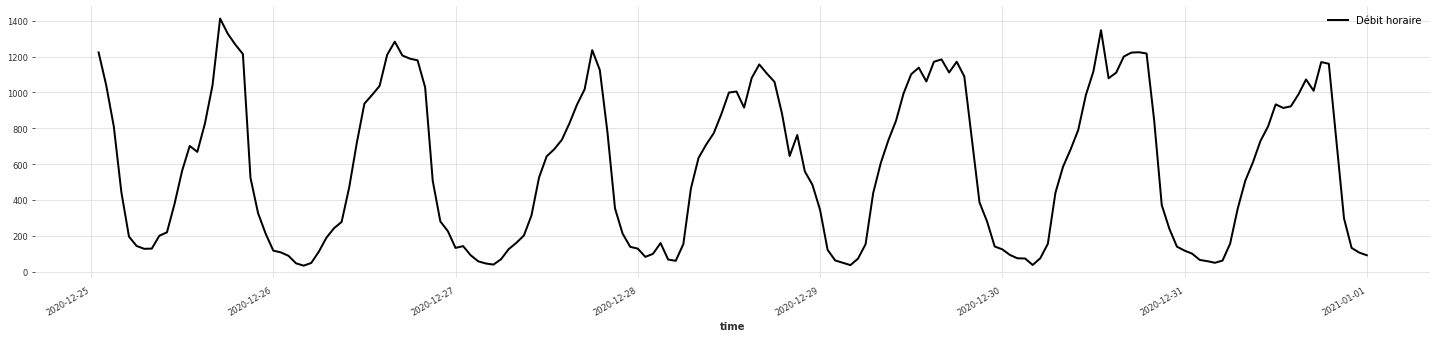

In [93]:
plt.rcParams['figure.figsize'] = [25, 5]
ts.univariate_component(0).plot(label='Débit horaire')
ts.drop_before(pd.Timestamp("2020-11-01")).univariate_component(0).plot(label='Débit horaire', new_plot=True)
ts.drop_before(pd.Timestamp("2020-12-01")).univariate_component(0).plot(label='Débit horaire', new_plot=True)
ts.drop_before(pd.Timestamp("2020-12-25")).univariate_component(0).plot(label='Débit horaire', new_plot=True)

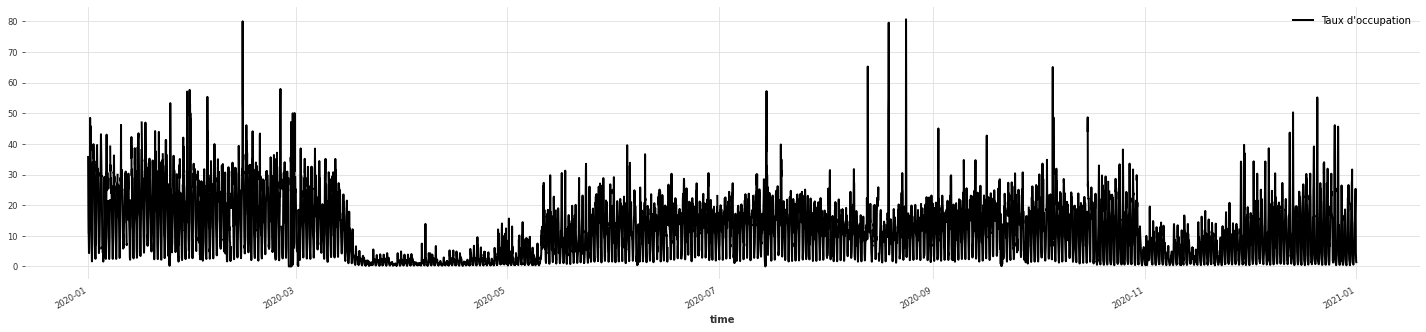

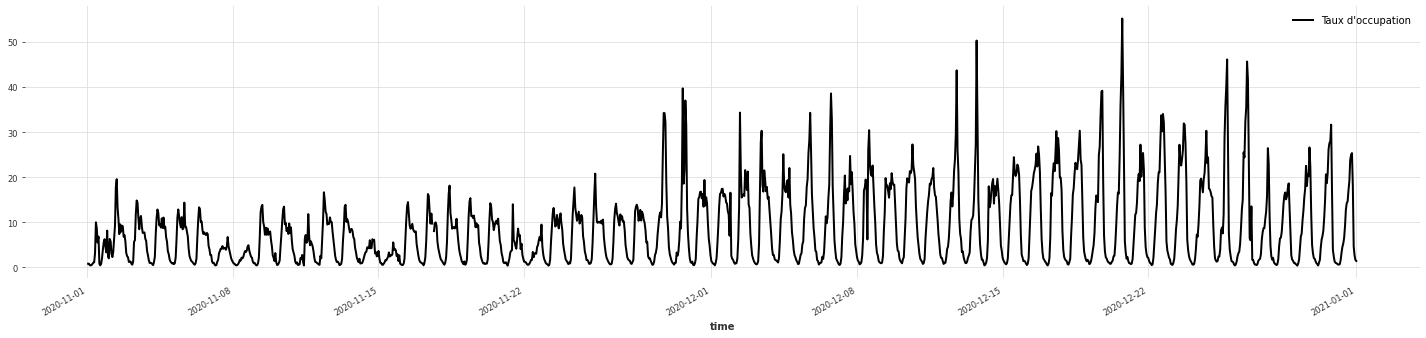

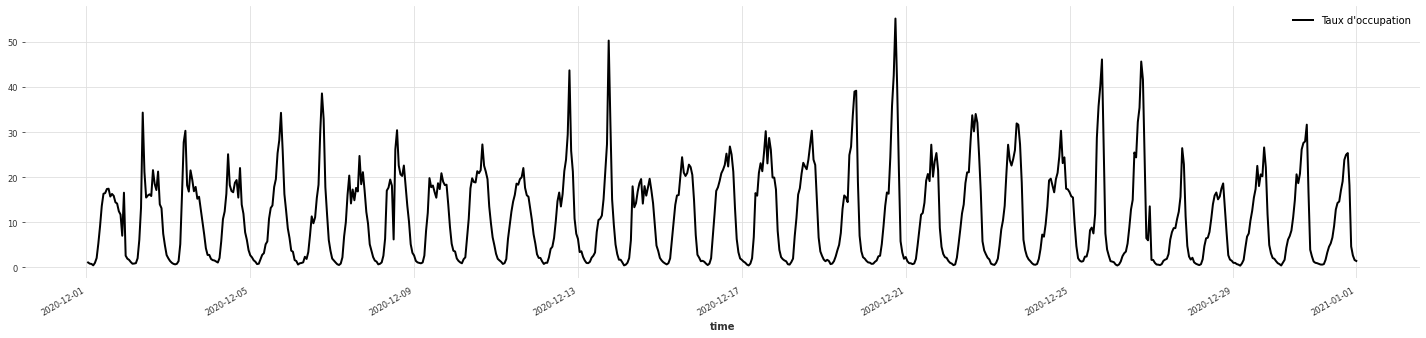

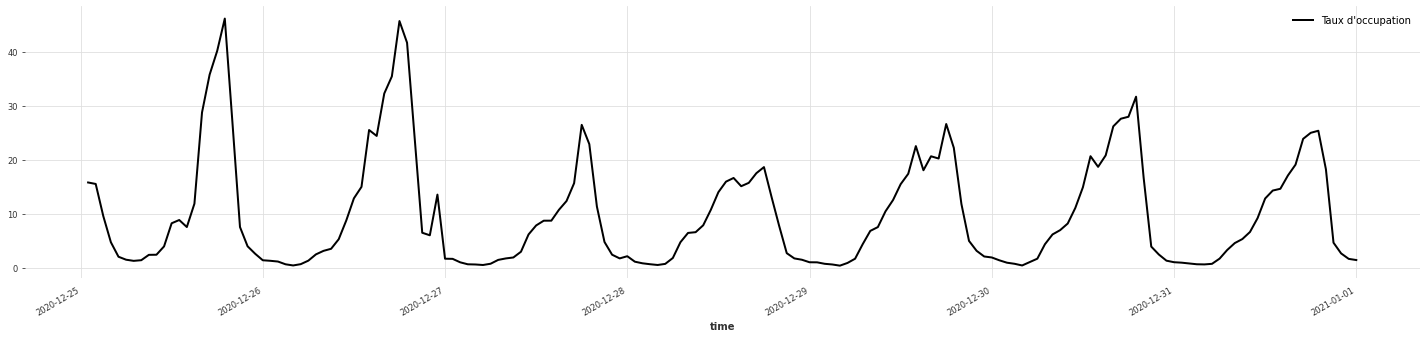

In [106]:
# plot component of index 0 after 2021-11-04 
ts.univariate_component(1).plot(label="Taux d'occupation")
ts.drop_before(pd.Timestamp("2020-11-01")).univariate_component(1).plot(label="Taux d'occupation", new_plot=True)
ts.drop_before(pd.Timestamp("2020-12-01")).univariate_component(1).plot(label="Taux d'occupation", new_plot=True)
ts.drop_before(pd.Timestamp("2020-12-25")).univariate_component(1).plot(label="Taux d'occupation", new_plot=True)

Saisonnalités:
* chaque année ?
* chaque mois
* chaque jour

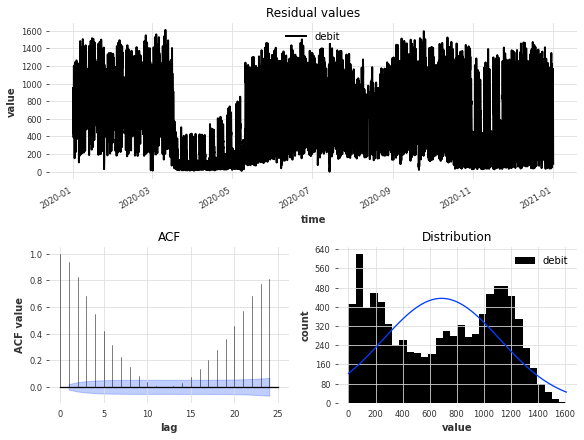

In [95]:
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis, plot_hist, extract_trend_and_seasonality
plot_residuals_analysis(ts.univariate_component(0), num_bins=30)

## fill missing values

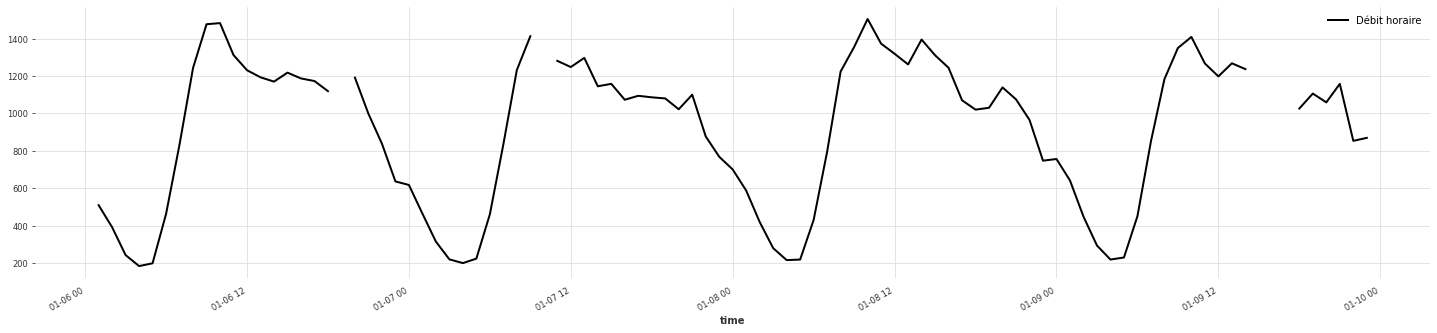

In [151]:
tdf = ts.pd_dataframe()
ts.drop_before(pd.Timestamp("2020-01-06")).drop_after(pd.Timestamp("2020-01-10")).univariate_component(0).plot(label='Débit horaire', new_plot=True)

In [152]:
# fill missing values in tdf
tdf.interpolate(method='linear', inplace=True)
tdf.isna().sum()

component
debit         0
occupation    0
dtype: int64

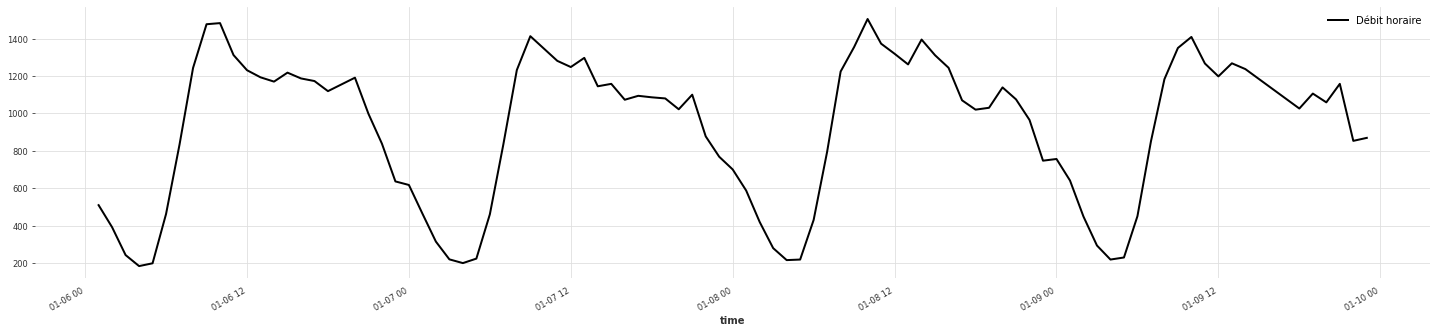

In [153]:
ts = TimeSeries.from_dataframe(tdf)
ts.drop_before(pd.Timestamp("2020-01-06")).drop_after(pd.Timestamp("2020-01-10")).univariate_component(0).plot(label='Débit horaire', new_plot=True)

In [157]:
tdf = ts.pd_dataframe()
tdf.to_csv("data/all_tdf.csv")